# Support Vector Machine

Support vector machine or SVM is another one of the most widely used algorithm for classification.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 800
svg_renderer.height = 500
pio.renderers.default = "svg"

## Model without oversample data

In [2]:
# Load the data
df = pd.read_csv('./../../data/engineered_data.csv')

In [3]:
# Drop the index column
df.drop('Unnamed: 0', axis=1, inplace=True)

Before modelinng the data, it is necessary to split the data into training and testing set.

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=42)

### Model Building

In [5]:
# Declare the SVM model without 'poly' kernel
svm_clf = SVC(probability=True, class_weight='balanced')

# Declare the grid paramters to be searched
svm_params = dict(
    C = np.logspace(-4, 0, num=5),
    kernel = ['linear', 'rbf', 'sigmoid']
)

In [6]:
# For training SVM without 'poly' kernel

# Declare the gridsearch object
grid_search = GridSearchCV(svm_clf, svm_params, scoring='roc_auc', n_jobs=7, refit=True, cv=10, verbose=3)

# Fit the model
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 4/10] END ..........C=0.0001, kernel=linear;, score=0.857 total time=  53.0s
[CV 6/10] END ..........C=0.0001, kernel=linear;, score=0.863 total time=  53.8s
[CV 2/10] END ..........C=0.0001, kernel=linear;, score=0.822 total time=  54.1s
[CV 3/10] END ..........C=0.0001, kernel=linear;, score=0.852 total time=  54.4s
[CV 1/10] END ..........C=0.0001, kernel=linear;, score=0.858 total time=  54.6s
[CV 5/10] END ..........C=0.0001, kernel=linear;, score=0.863 total time=  54.8s
[CV 7/10] END ..........C=0.0001, kernel=linear;, score=0.856 total time=  55.4s
[CV 10/10] END .........C=0.0001, kernel=linear;, score=0.852 total time=  43.1s
[CV 8/10] END ..........C=0.0001, kernel=linear;, score=0.848 total time=  44.1s
[CV 9/10] END ..........C=0.0001, kernel=linear;, score=0.839 total time=  43.7s
[CV 2/10] END .............C=0.0001, kernel=rbf;, score=0.513 total time=  58.6s
[CV 1/10] END .............C=0.0001, kernel=rb

In [7]:
# Declare the SVM model with 'poly' kernel
svm_clf_poly = SVC(probability=True, class_weight='balanced', kernel='poly')

# Declare the grid paramters to be searched
svm_params_poly = dict(
    C = np.logspace(-4, 0, num=5),
    degree = [2, 3, 4]
)

In [42]:
# For training SVM without 'poly' kernel

# Declare the gridsearch object
grid_search_poly = GridSearchCV(svm_clf_poly, svm_params_poly, scoring='roc_auc', n_jobs=7, refit=True, cv=10, verbose=5)

# Fit the model
grid_result_poly = grid_search_poly.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 7/10] END ...............C=0.0001, degree=2;, score=0.496 total time= 2.3min
[CV 5/10] END ...............C=0.0001, degree=2;, score=0.520 total time= 2.4min
[CV 6/10] END ...............C=0.0001, degree=2;, score=0.508 total time= 2.4min
[CV 3/10] END ...............C=0.0001, degree=2;, score=0.519 total time= 2.4min
[CV 4/10] END ...............C=0.0001, degree=2;, score=0.497 total time= 2.4min
[CV 2/10] END ...............C=0.0001, degree=2;, score=0.488 total time= 2.4min
[CV 1/10] END ...............C=0.0001, degree=2;, score=0.505 total time= 2.4min
[CV 9/10] END ...............C=0.0001, degree=2;, score=0.525 total time= 2.3min
[CV 8/10] END ...............C=0.0001, degree=2;, score=0.479 total time= 2.3min
[CV 1/10] END ...............C=0.0001, degree=3;, score=0.496 total time= 2.3min
[CV 10/10] END ..............C=0.0001, degree=2;, score=0.472 total time= 2.3min
[CV 4/10] END ...............C=0.0001, degree=

### Inferencing

In [43]:
# Get the best model parameters
print(f"Best score of {grid_result.best_score_} is achieved by using {grid_result.best_params_}")
print(f"Best score of {grid_result_poly.best_score_} is achieved by using {grid_result_poly.best_params_}")

Best score of 0.9582827048948805 is achieved by using {'C': 1.0, 'kernel': 'linear'}
Best score of 0.8522176297737245 is achieved by using {'C': 1.0, 'degree': 3}


In [10]:
# Predict on test data using the model
y_pred = grid_search.predict(X_test)
y_score = grid_search.predict_proba(X_test)[:, 1]

### Evaluation

In [11]:
# Find the ROC AUC score
print(f"Area under the ROC curve: {roc_auc_score(y_test, y_score)}")

Area under the ROC curve: 0.9472100846919147


In [12]:
# Calculate parameters for roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

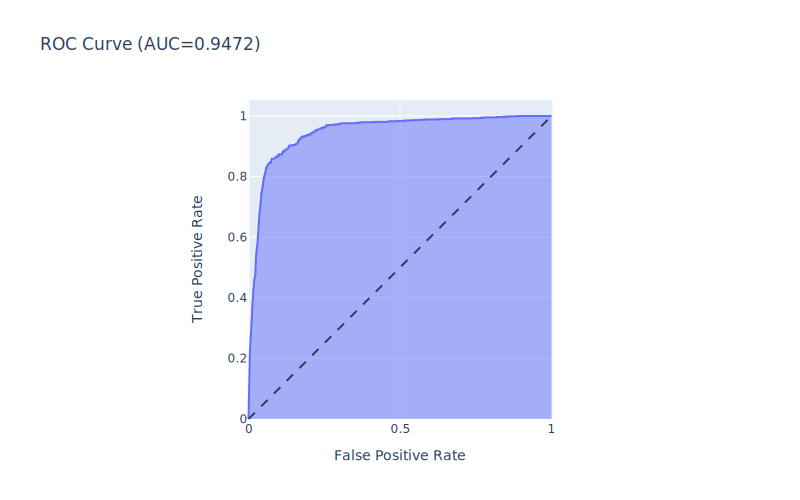

In [13]:
# Plot the curve and area under the curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

An AUC score of 0.88 is quite remarkable and it suggest that model is quite good in predicting whether a project on Kickstarter will be succecssful or not.

In [14]:
# Create a ROC dataframe from the obtained FPR and TPR
roc_df = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'threshold': thresholds
})

In [15]:
# Get the values of threshold for true positive rate between 0.79 and 0.81
roc_df[roc_df['tpr'].between(0.79, 0.81)]

,fpr,tpr,threshold
184,0.049618,0.793615,0.515917
185,0.050095,0.793615,0.513528
186,0.050095,0.795895,0.511968
187,0.051050,0.795895,0.511324
188,0.051050,0.799316,0.510062
189,0.051527,0.799316,0.508657
190,0.051527,0.800456,0.508389
191,0.052481,0.800456,0.507243
192,0.052481,0.801596,0.506943


From the above table, it is safe to assume the threshold value of 0.5 for classifying the observations.

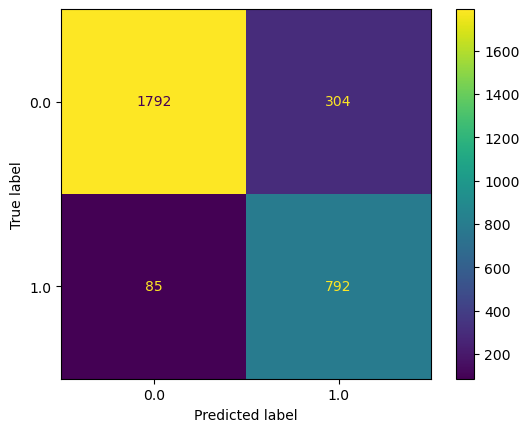

In [16]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_result, X_test, y_test)  

In [17]:
# Save the model
joblib.dump(grid_result, './../../data/models/svm.pkl')
joblib.dump(grid_result_poly, './../../data/models/svm_poly.pkl')

['./../../data/models/svm_poly.pkl']

## Model with oversample data

In [18]:
# Load the data
df = pd.read_csv('./../../data/engineered_data_oversampled.csv')

In [19]:
# Drop the index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=42)

### Model Building

In [21]:
# Declare the SVM model
svm_clf = SVC(probability=True, class_weight='balanced')

# Declare the grid paramters to be searched
svm_params = dict(
    C = np.logspace(-3, 0, num=4),
    kernel = ['linear', 'rbf', 'sigmoid']
)

In [22]:
# Declare the gridsearch object
grid_search = GridSearchCV(svm_clf, svm_params, scoring='roc_auc', n_jobs=7, refit=True, cv=10, verbose=5)

# Fit the model
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 5/10] END ...........C=0.001, kernel=linear;, score=0.934 total time= 2.3min
[CV 7/10] END ...........C=0.001, kernel=linear;, score=0.936 total time= 2.4min
[CV 2/10] END ...........C=0.001, kernel=linear;, score=0.938 total time= 2.4min
[CV 6/10] END ...........C=0.001, kernel=linear;, score=0.935 total time= 2.4min
[CV 4/10] END ...........C=0.001, kernel=linear;, score=0.919 total time= 2.5min
[CV 3/10] END ...........C=0.001, kernel=linear;, score=0.935 total time= 2.5min
[CV 1/10] END ...........C=0.001, kernel=linear;, score=0.943 total time= 2.5min
[CV 8/10] END ...........C=0.001, kernel=linear;, score=0.935 total time= 2.6min
[CV 9/10] END ...........C=0.001, kernel=linear;, score=0.940 total time= 2.6min
[CV 10/10] END ..........C=0.001, kernel=linear;, score=0.941 total time= 2.7min
[CV 1/10] END ..............C=0.001, kernel=rbf;, score=0.524 total time= 3.4min
[CV 3/10] END ..............C=0.001, kernel=rb

### Inferencing

In [32]:
# Get the best model parameters
print(f"Best score of {grid_result.best_score_} is achieved by using {grid_result.best_params_}")

Best score of 0.9582827048948805 is achieved by using {'C': 1.0, 'kernel': 'linear'}


In [33]:
# Predict on test data using the model
y_pred = grid_search.predict(X_test)
y_score = grid_search.predict_proba(X_test)[:, 1]

### Evaluation

In [34]:
# Find the ROC AUC score
print(f"Area under the ROC curve: {roc_auc_score(y_test, y_score)}")

Area under the ROC curve: 0.9514918050788321


With the new oversampled data, there is a marginal improvement in the performance of the logistic regression algorithm.

In [35]:
# Calculate parameters for roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

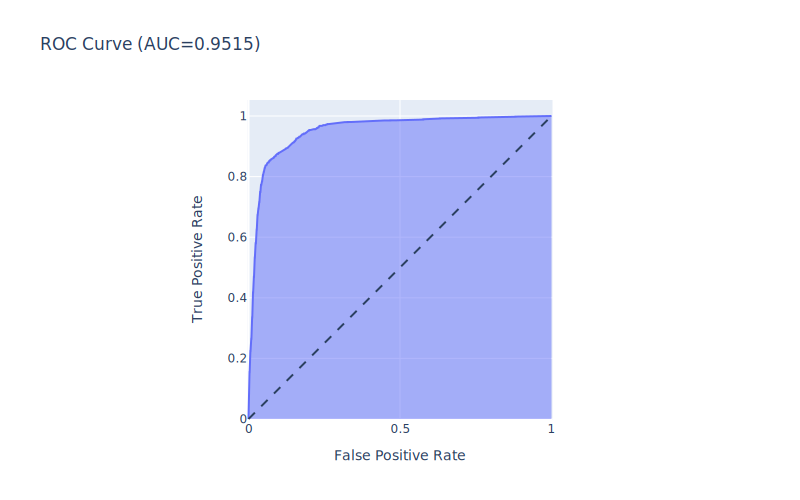

In [36]:
# Plot the curve and area under the curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [37]:
# Create a ROC dataframe from the obtained FPR and TPR
roc_df = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'threshold': thresholds
})

In [38]:
# Get the values of threshold for true positive rate between 0.79 and 0.81
roc_df[roc_df['tpr'].between(0.79, 0.81)]

,fpr,tpr,threshold
180,0.045564,0.797637,0.706893
181,0.046523,0.797637,0.703944
182,0.046523,0.802068,0.700007
183,0.047002,0.802068,0.699629
184,0.047002,0.803053,0.699390
185,0.047482,0.803053,0.699164
186,0.047482,0.804530,0.698722
187,0.047962,0.804530,0.698178
188,0.047962,0.807484,0.695471
189,0.048441,0.807484,0.695072


For this data set also, it is safe to assume the threshold of 0.5.

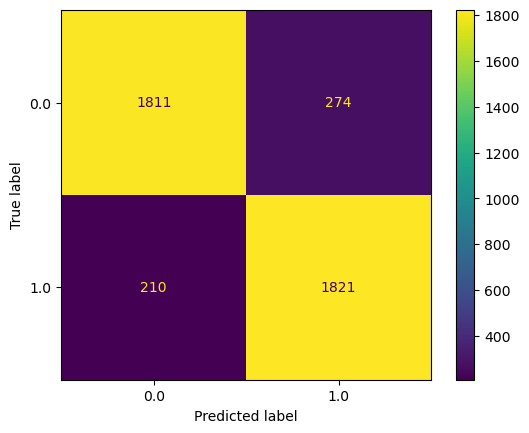

In [39]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_result, X_test, y_test)  

In [40]:
# Save the model
joblib.dump(grid_result, './../../data/models/svm_oversample.pkl')

['./../../data/models/svm_oversample_poly.pkl']